In [969]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns

In [970]:
data = pd.read_csv('./data/data_procesada.csv', delimiter=';')
data.describe()

,No.,NIT,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\r\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\r\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
count,991.000000,9.910000e+02,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02,9.910000e+02,991.000000
mean,521.610494,8.596067e+08,2.792129,1.566095,5.816347,21.196771,90.243189,3.438951,1.133818e+10,6.276915e+08,1.155593e+10,6.619571e+09,6.362112e+11,9.675413e+09,1.172656e+08,1.034432e+10,5.694767e+09,4.792101e+09,0.249243
std,307.675465,3.786498e+07,0.704372,1.389506,7.897230,21.164785,51.930357,1.954548,4.328659e+10,5.228412e+09,4.770671e+10,2.717802e+10,1.987314e+13,3.582129e+10,5.418106e+09,4.437675e+10,2.595444e+10,2.350854e+10,0.451078
min,1.000000,8.000003e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.343546e+09,-6.993593e+10,7.329964e+07,9.900000e+01,-7.303930e+10,0.000000e+00,-7.977997e+10,6.788196e+07,6.309000e+04,-6.786768e+10,0.000000
25%,253.500000,8.300126e+08,3.000000,1.000000,2.000000,7.000000,47.500000,1.000000,1.801949e+09,1.010268e+07,1.235960e+09,6.726837e+08,3.207892e+08,1.582395e+09,4.293630e+06,1.124452e+09,5.974371e+08,2.724533e+08,0.000000
50%,516.000000,8.600695e+08,3.000000,1.000000,2.000000,7.000000,97.000000,4.000000,2.818939e+09,6.758277e+07,2.547907e+09,1.381185e+09,8.770659e+08,2.514686e+09,5.155557e+07,2.208604e+09,1.193259e+09,7.900442e+08,0.000000
75%,783.000000,8.913002e+08,3.000000,3.000000,7.000000,37.000000,122.000000,5.000000,6.356808e+09,2.739059e+08,6.547724e+09,3.638716e+09,2.676941e+09,5.402983e+09,1.995470e+08,5.825373e+09,3.032011e+09,2.286857e+09,0.000000
max,1068.000000,9.010975e+08,4.000000,6.000000,24.000000,81.000000,185.000000,6.000000,7.014040e+11,1.155640e+11,1.137620e+12,5.654820e+11,6.256140e+14,5.948910e+11,6.620412e+10,1.075490e+12,5.965040e+11,4.789860e+11,2.000000


In [971]:
important_features = ['GANANCIA (PERDIDA) 2018' ,'GANANCIA (PERDIDA) 2017', 
                      'TOTAL PASIVOS 2018', 'TOTAL PASIVOS 2017', 
                      'TOTAL ACTIVOS 2018', 'TOTAL ACTIVOS 2017',
                      'TOTAL PATRIMONIO 2018', 'TOTAL PATRIMONIO 2017',
                      'INGRESOS OPERACIONALES\r\n2018*', 'INGRESOS OPERACIONALES\r\n2017*']
       

In [972]:
data['TOTAL ACTIVOS 2017_log'] = np.log(data['TOTAL ACTIVOS 2017'])
del data['TOTAL ACTIVOS 2017']
data['TOTAL ACTIVOS 2018_log'] = np.log(data['TOTAL ACTIVOS 2018'])
del data['TOTAL ACTIVOS 2018']
del data['INGRESOS OPERACIONALES\r\n2017*']
data['INGRESOS OPERACIONALES 2018_log'] = np.log(data['INGRESOS OPERACIONALES\r\n2018*'])
del data['INGRESOS OPERACIONALES\r\n2018*']
data['TOTAL PASIVOS 2018_log'] = np.log(data['TOTAL PASIVOS 2018'])
del data['TOTAL PASIVOS 2018']
data['TOTAL PASIVOS 2017_log'] = np.log(data['TOTAL PASIVOS 2017'])
del data['TOTAL PASIVOS 2017']
del data['No.']
del data['NIT']
data_numeros = data.copy()



In [973]:
scaler = StandardScaler()
data_numeros['TOTAL PATRIMONIO 2018'] = scaler.fit_transform(data_numeros[['TOTAL PATRIMONIO 2018']])
data_numeros['TOTAL PATRIMONIO 2017'] = scaler.fit_transform(data_numeros[['TOTAL PATRIMONIO 2017']])
data_numeros['GANANCIA (PERDIDA) 2017'] = scaler.fit_transform(data_numeros[['GANANCIA (PERDIDA) 2017']])
data_numeros['GANANCIA (PERDIDA) 2018'] = scaler.fit_transform(data_numeros[['GANANCIA (PERDIDA) 2018']])
data_numeros['TOTAL PATRIMONIO 2018'] = normalize(data_numeros[['TOTAL PATRIMONIO 2018']])
data_numeros['TOTAL PATRIMONIO 2017'] = normalize(data_numeros[['TOTAL PATRIMONIO 2017']])
data_numeros['GANANCIA (PERDIDA) 2017'] = normalize(data_numeros[['GANANCIA (PERDIDA) 2017']])
data_numeros['GANANCIA (PERDIDA) 2018'] = normalize(data_numeros[['GANANCIA (PERDIDA) 2018']])
x=data_numeros
del data_numeros['SUPERVISOR']
del data_numeros['DEPARTAMENTO DOMICILIO']
del data_numeros['MACROSECTOR']
del data_numeros['GRUPO EN NIIF']
del data_numeros['RAZON SOCIAL']
#del data_numeros['TOTAL ACTIVOS 2017_log']
#del data_numeros['TOTAL ACTIVOS 2018_log']
#del data_numeros['INGRESOS OPERACIONALES 2018_log']
#del data_numeros['TOTAL PASIVOS 2018_log']
del data_numeros['TOTAL PASIVOS 2017_log']
#del data_numeros['TOTAL PATRIMONIO 2018']
del data_numeros['TOTAL PATRIMONIO 2017']
#del data_numeros['GANANCIA (PERDIDA) 2017']
#del data_numeros['GANANCIA (PERDIDA) 2018']
#del data_numeros['REGIÓN']
del data_numeros['CIUDAD DOMICILIO']
#del data_numeros['CIIU']

data_numeros.describe()


,REGIÓN,CIIU,GANANCIA (PERDIDA) 2018,TOTAL PATRIMONIO 2018,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017_log,TOTAL ACTIVOS 2018_log,INGRESOS OPERACIONALES 2018_log,TOTAL PASIVOS 2018_log
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,1.566095,90.243189,-0.693239,-0.997982,-0.283552,21.733156,21.864887,22.098075,21.213487
std,1.389506,51.930357,0.721072,0.063532,0.959441,1.351374,1.346424,1.061576,1.527994
min,0.000000,0.000000,-1.000000,-1.000000,-1.000000,18.033281,18.110066,21.018578,4.595120
25%,1.000000,47.500000,-1.000000,-1.000000,-1.000000,20.840562,20.935107,21.312135,20.326782
50%,1.000000,97.000000,-1.000000,-1.000000,-1.000000,21.515627,21.658538,21.759626,21.046207
75%,3.000000,122.000000,-1.000000,-1.000000,1.000000,22.485482,22.602382,22.572775,22.014896
max,6.000000,185.000000,1.000000,1.000000,1.000000,27.703797,27.759959,27.276350,27.060944


In [974]:
nc = 10
mc = 0.05
x1 = 0.05
optics_model = OPTICS(min_samples = nc, xi = x1, min_cluster_size = mc)
optics_model.fit_predict(x)

array([-1,  2,  2,  4, -1,  2,  0,  2,  0, -1,  2,  0,  2,  0,  4,  0,  0,
        2,  3,  0,  2,  4,  2,  0,  2,  2,  2,  4, -1, -1, -1, -1, -1,  2,
       -1,  0,  0,  4,  2,  0, -1, -1,  2,  1, -1,  0, -1,  2, -1,  2,  0,
        0,  2,  2,  4,  3,  2, -1,  2,  0,  1, -1,  0,  0,  2,  3,  4, -1,
        3,  0,  2,  0,  2, -1,  4,  2,  0,  2, -1,  2, -1,  2,  3, -1, -1,
        0,  1,  2, -1,  2,  4,  0,  0,  2, -1, -1, -1, -1,  2, -1,  0, -1,
        3,  2,  0,  0,  2, -1, -1,  2, -1, -1, -1,  2,  4,  2,  4, -1,  2,
       -1,  2, -1,  0,  2, -1,  0, -1, -1,  4, -1,  2,  2, -1, -1, -1, -1,
        2, -1, -1,  3, -1,  3,  2,  3,  2,  0,  0,  1,  2, -1,  0,  2,  2,
        3,  2,  2, -1,  0,  3, -1, -1,  3, -1, -1,  2,  4,  0, -1,  4, -1,
        2,  0,  2,  3,  0,  2,  1,  0, -1, -1,  0, -1,  2,  4,  2, -1,  4,
        1,  2, -1,  2,  4,  2, -1,  0,  2, -1,  2,  4,  0, -1,  2,  2,  1,
       -1,  2,  2,  2,  0,  2,  2,  3, -1, -1,  0, -1,  3,  1, -1,  0,  2,
        3,  2,  0,  2,  4

In [975]:
# Producing the labels according to the DBSCAN technique with eps = 0.5
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
core_distances = optics_model.core_distances_,
ordering = optics_model.ordering_, eps = 0.5)

# Producing the labels according to the DBSCAN technique with eps = 2.0
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_,
core_distances = optics_model.core_distances_,
ordering = optics_model.ordering_, eps = 2)

# Creating a numpy array with numbers at equal spaces till
# the specified range
space = np.arange(len(x))

# Storing the reachability distance of each point
reachability = optics_model.reachability_[optics_model.ordering_]

# Storing the cluster labels of each point
labels = optics_model.labels_[optics_model.ordering_]

print(labels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

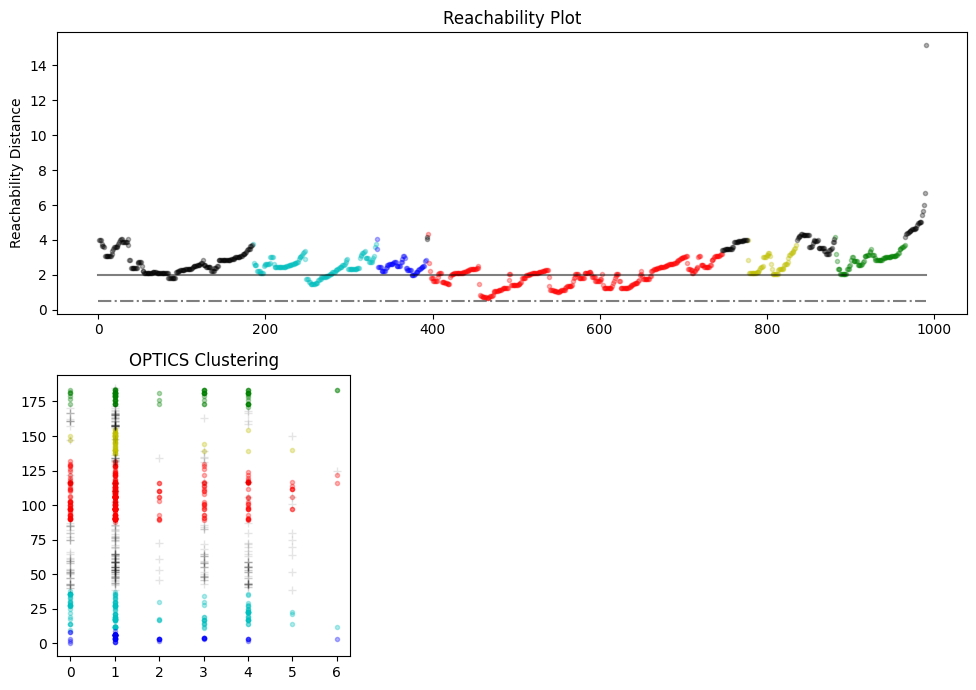

In [976]:
# Defining the framework of the visualization
plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])


# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	Xk = space[labels == Class]
	Rk = reachability[labels == Class]
	ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')

# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	Xk = x[optics_model.labels_ == Class]
	ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
	
ax2.plot(x.iloc[optics_model.labels_ == -1, 0],
		x.iloc[optics_model.labels_ == -1, 1],
	'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')


plt.tight_layout()
plt.show()


<AxesSubplot: >

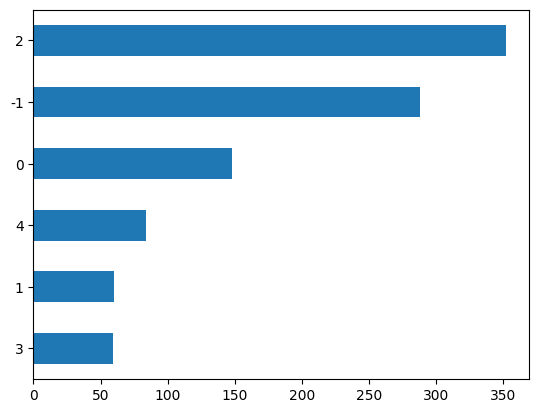

In [977]:
x['clusters'] = optics_model.fit_predict(x)
x['clusters'] .value_counts().sort_values().plot.barh()

For n_clusters = 10 , the average silhouette score is : 0.4391276972364632


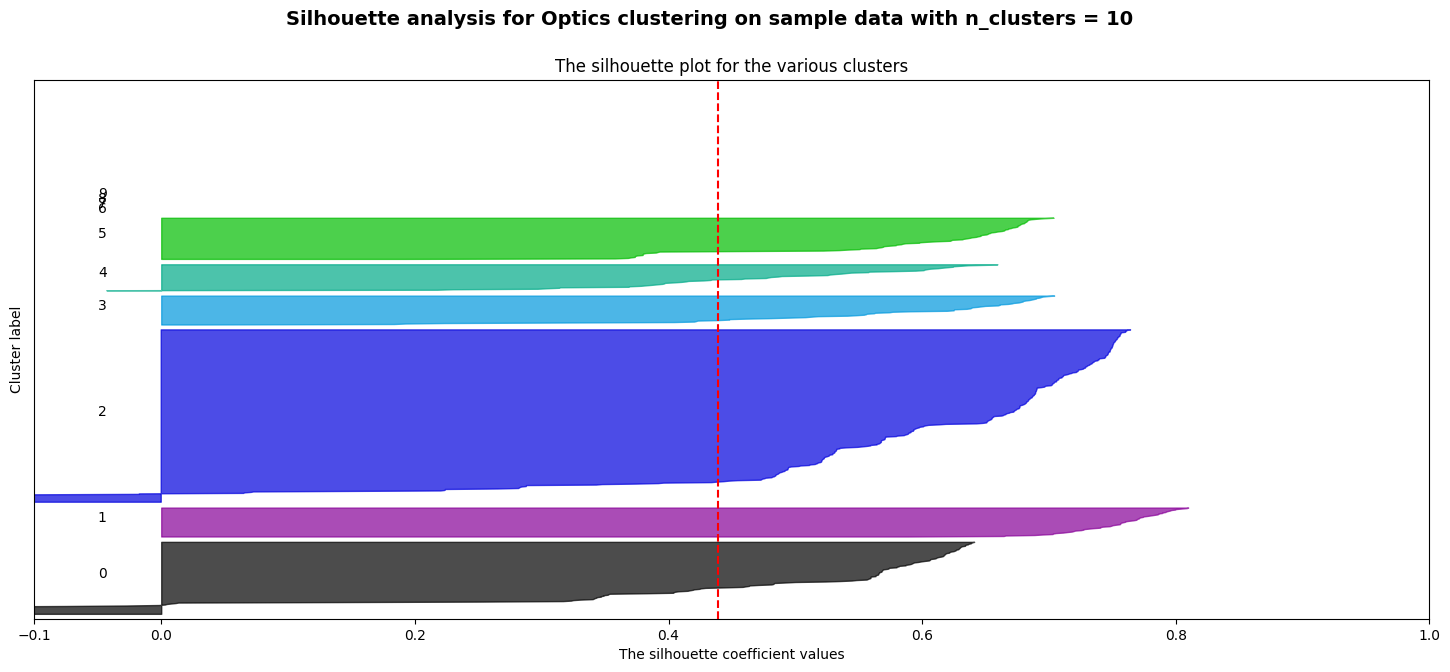

In [978]:
def plot_silhouette(X, nSam, random_state = 0):
    for n in nSam:
        kmeans_ = OPTICS(min_samples = n, xi = x1, min_cluster_size = mc)
        preds_ = kmeans_.fit_predict(x)

        # Se calcula el coeficiente de silueta general
        silhouette_avg = silhouette_score(x, preds_)
        print('For n_clusters =', n, ', the average silhouette score is :', silhouette_avg )

        # Se calcula el coeficiente de silueta para cada instancia
        sample_silhouette_values = silhouette_samples(x, preds_)

        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n + 1) * 10])

        y_lower = 10
        for i in range(n):
            ith_cluster_silhouette_values = sample_silhouette_values[preds_ == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title('The silhouette plot for the various clusters')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Cluster label')
        ax1.axvline(x=silhouette_avg, color = 'red', linestyle = '--')
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle('Silhouette analysis for Optics clustering on sample data with n_clusters = %d' % n, fontsize = 14, fontweight = 'bold')

    plt.show()
    
plot_silhouette(x, [nc])

C:\Users\Juliana\AppData\Local\Temp\ipykernel_1252\1027961035.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.displot(x, x=columns[i], hue='clusters', kind='kde', palette='Set2')
C:\Users\Juliana\AppData\Local\Temp\ipykernel_1252\1027961035.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.displot(x, x=columns[i], hue='clusters', kind='kde', palette='Set2')
C:\Users\Juliana\AppData\Local\Temp\ipykernel_1252\1027961035.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.displot(x, x=columns[i], hue='clusters', kind='kde', palette='Set2')


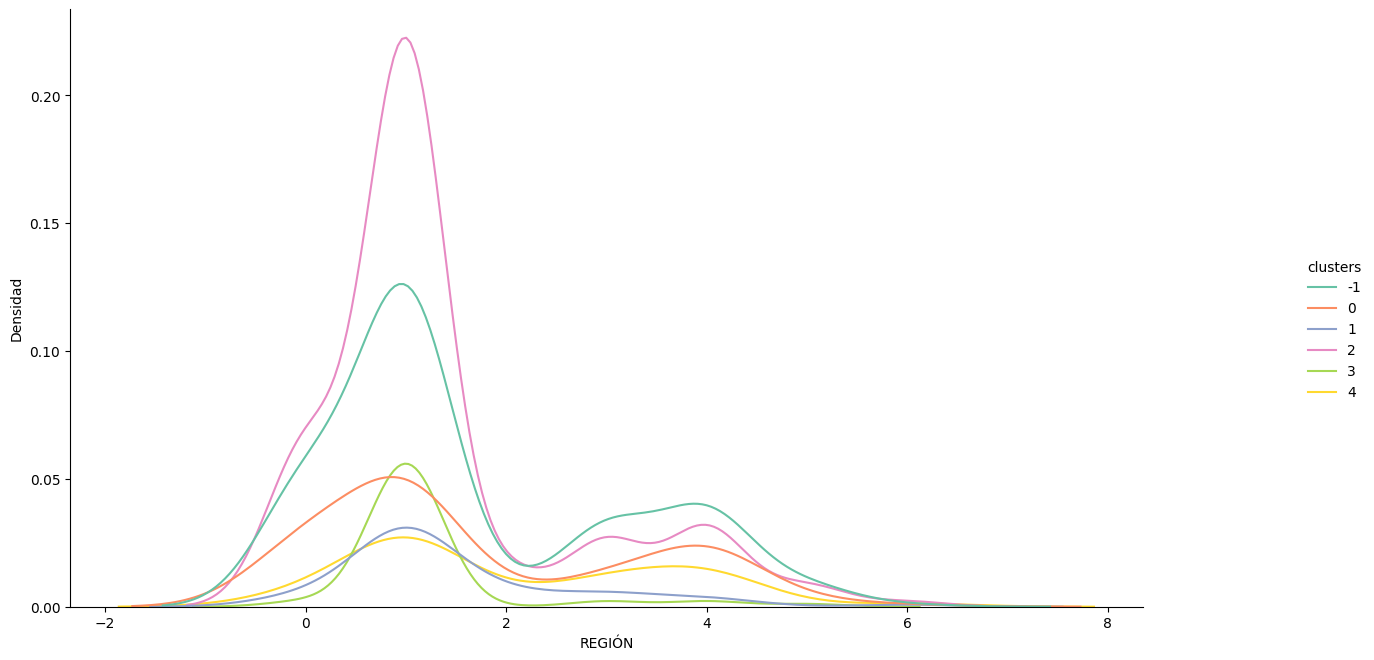

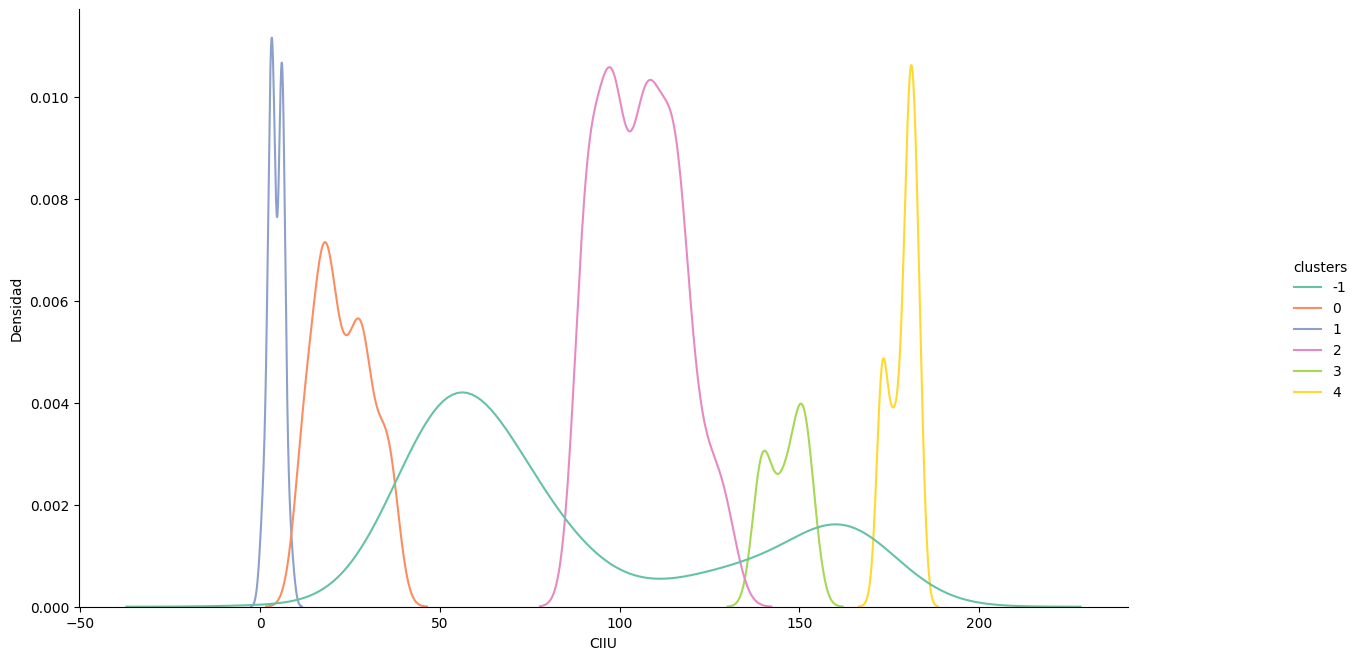

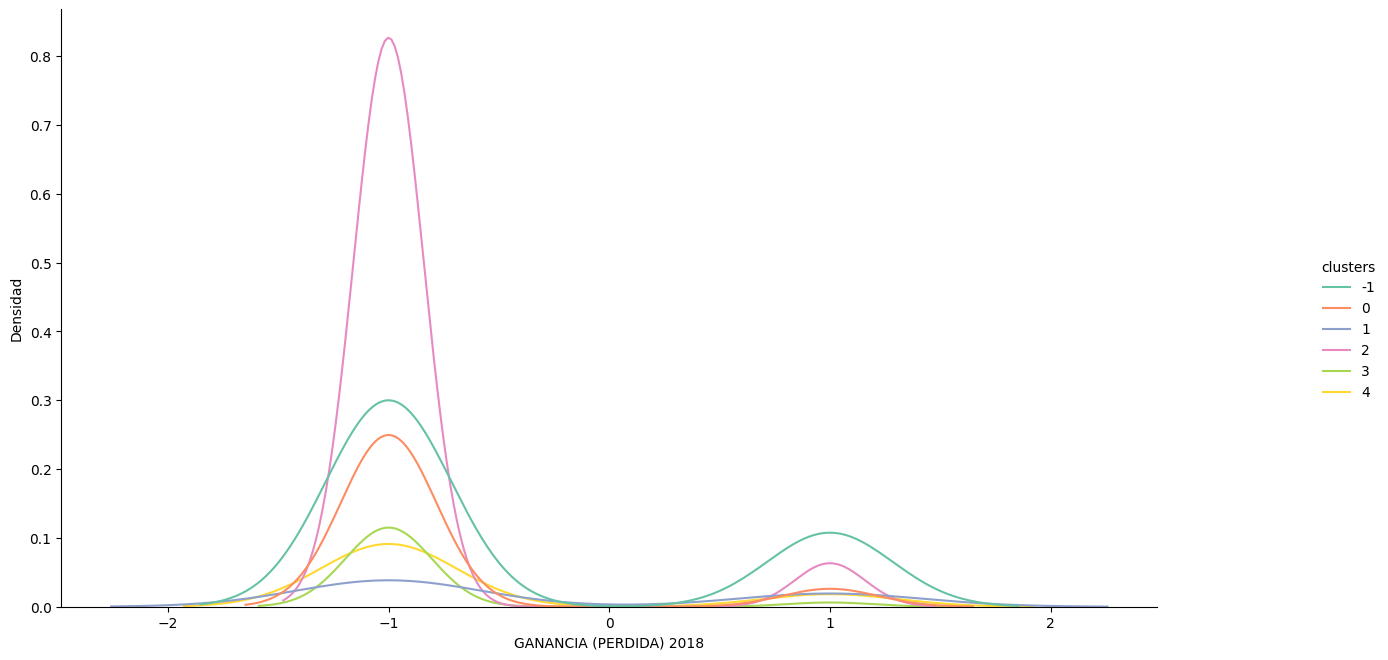

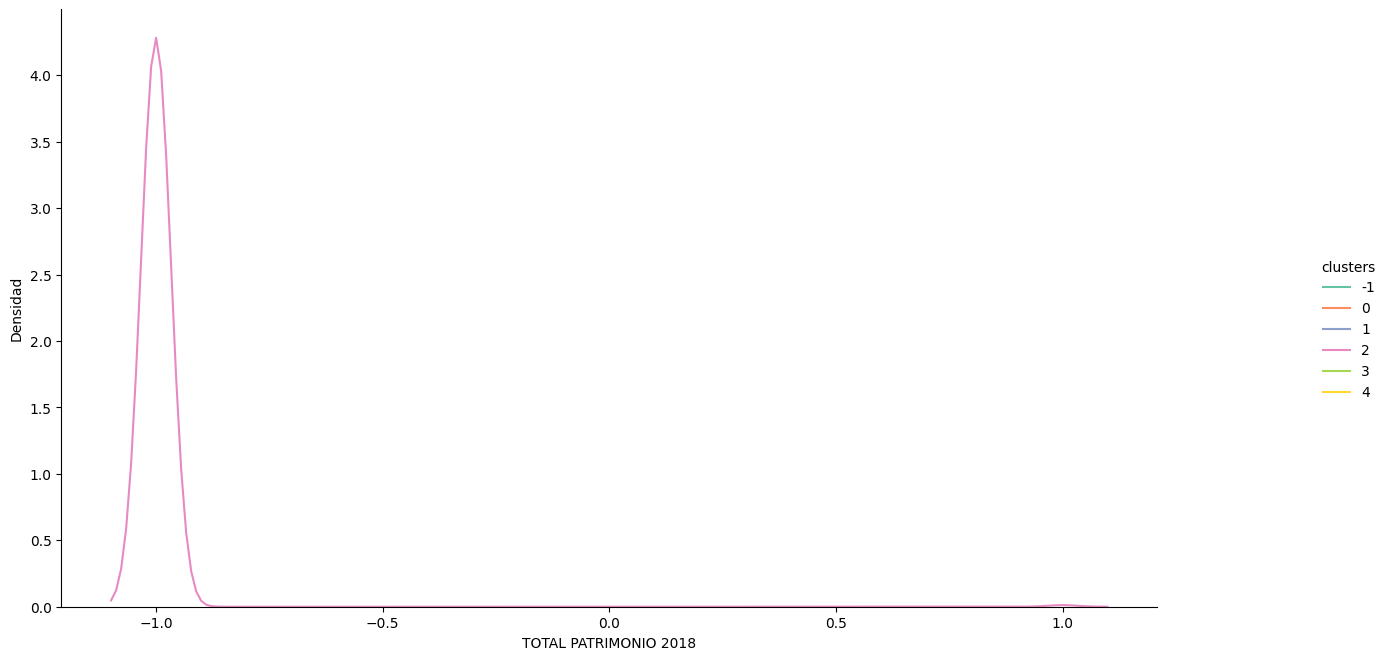

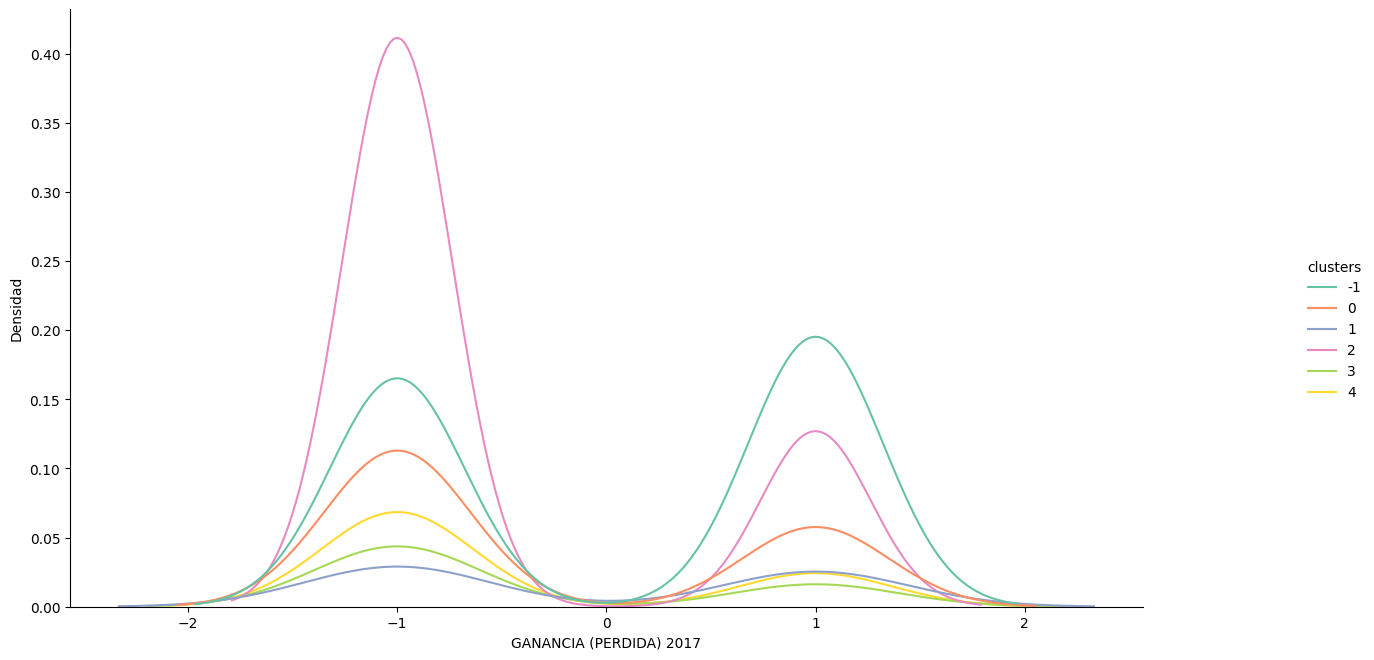

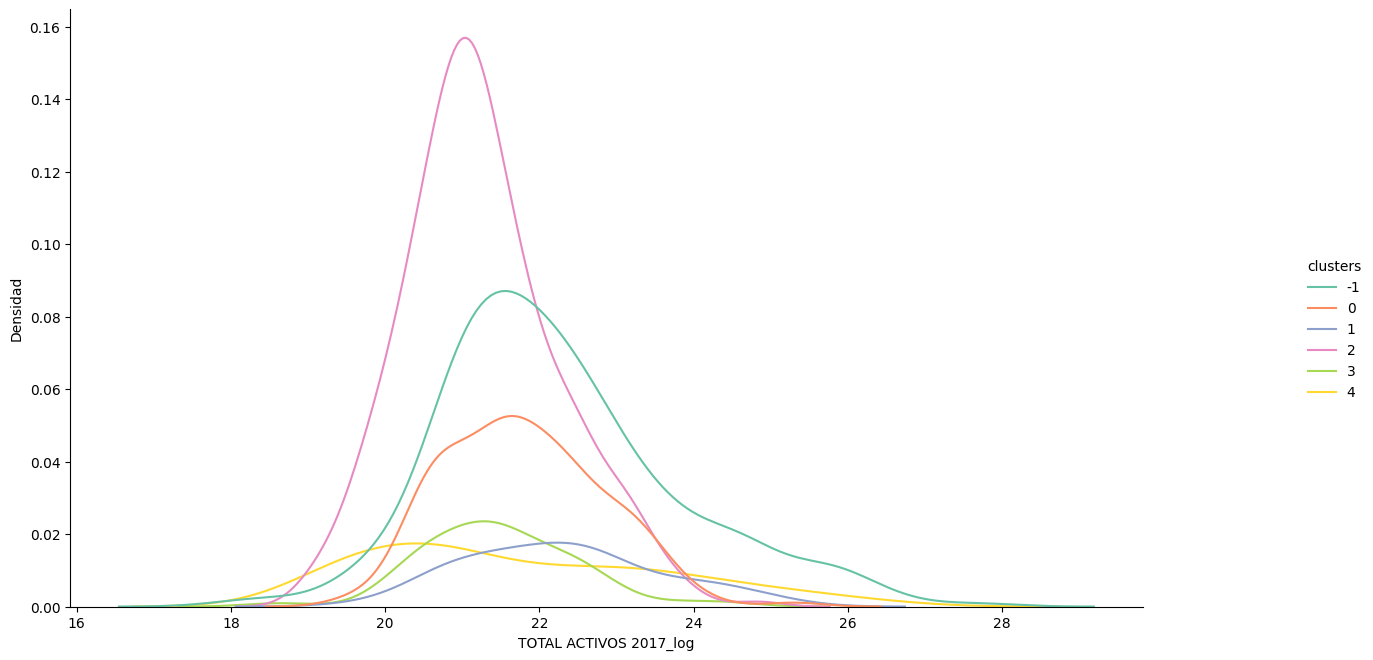

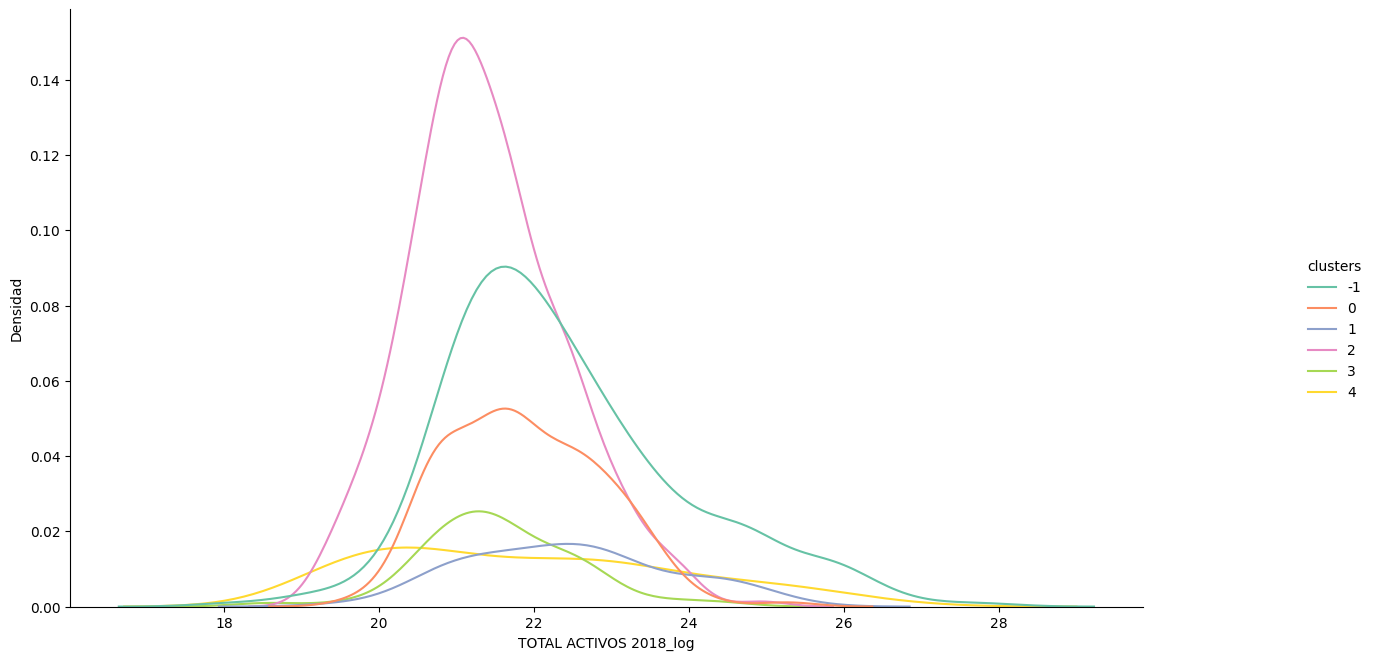

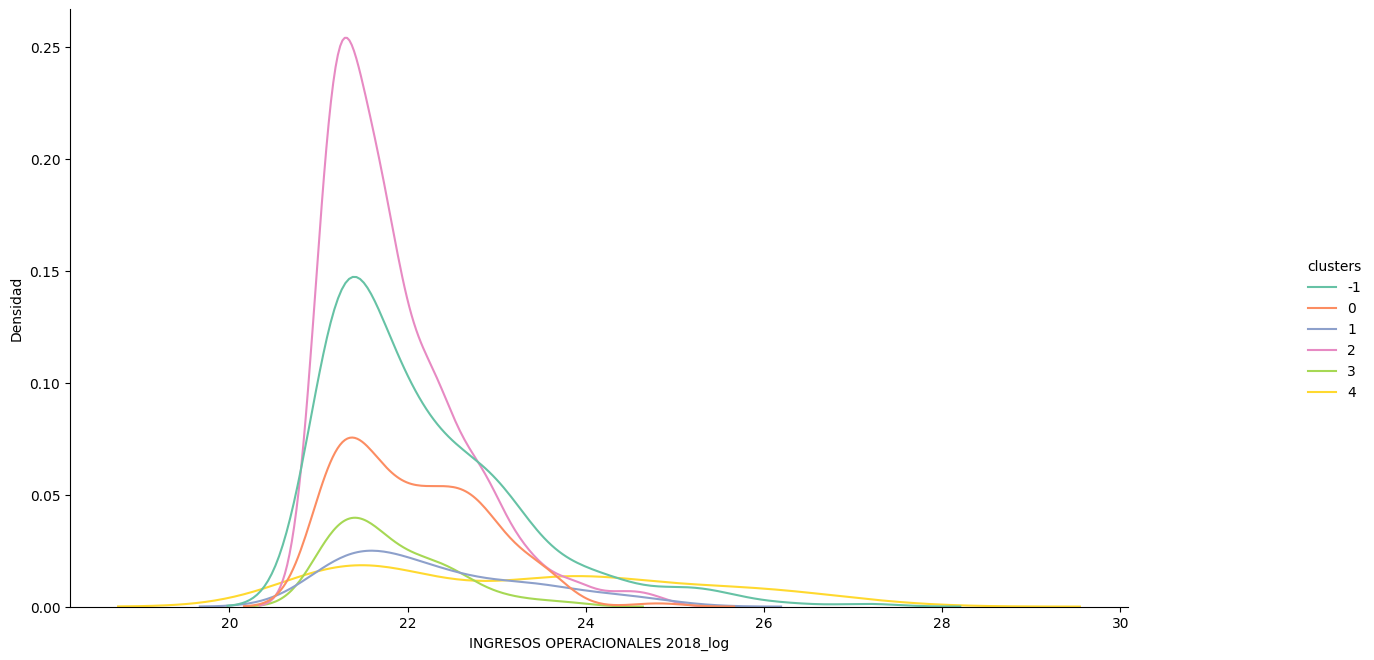

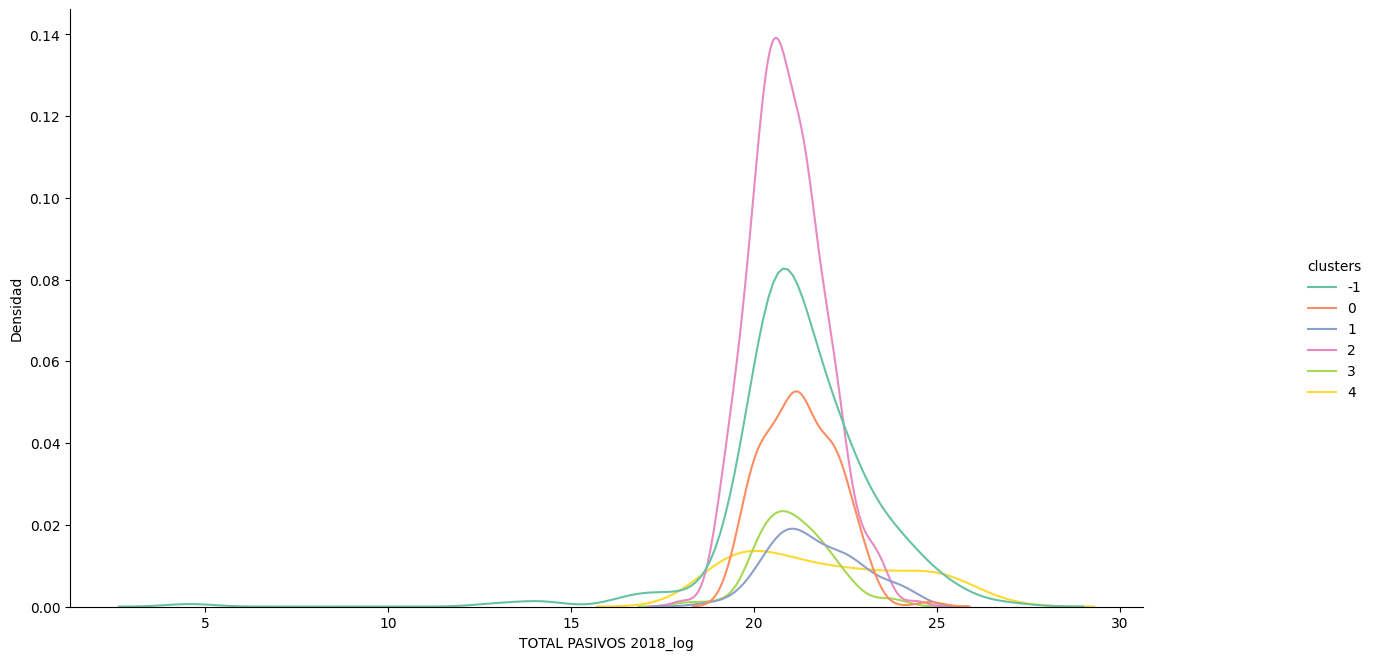

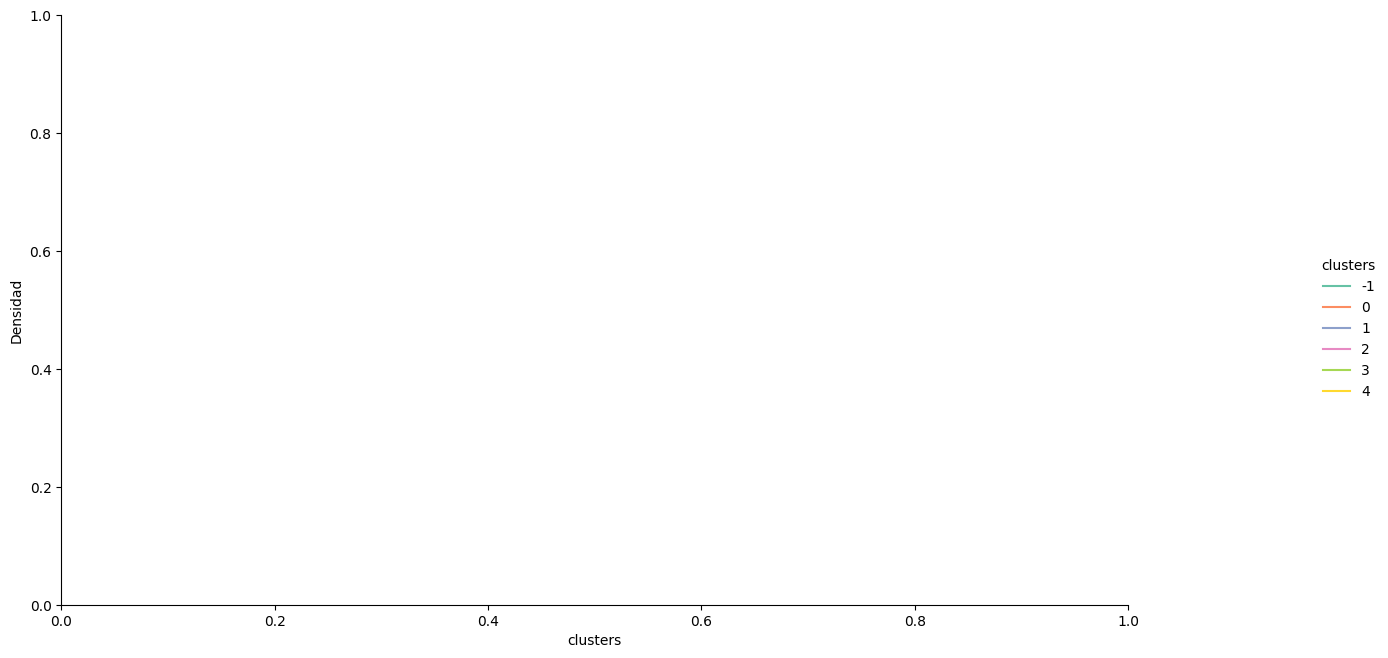

In [979]:
columns = x.columns
for i in range(len(columns)):
    g = sns.displot(x, x=columns[i], hue='clusters', kind='kde', palette='Set2')
    g.set(xlabel=columns[i], ylabel='Densidad')
    g.fig.set_size_inches(15, 7)
